## Leitura de uma base de imagens na forma
* base/
    * treino/
        * classes/...
            * imagens/...
    * teste/
        * classes/...
            * imagens/...

#### Será salva no formato
[matriz, numero da classe, nome da pasta onde a imagem esta salva (nome da classe)]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
import os
import pathlib

In [2]:
#DATADIR = "../bases/dados/imagens/mnist/train"
DATADIR = "../../../_DATA_/image/flowers"

DATADIR = pathlib.Path(DATADIR)

#IMG_SIZE = 28#'original'#Tamanho mxm e original
IMG_SIZE = 100#'original'#Tamanho mxm e original

formato = 'jpg'

#nome_saida = "mnist-train-2"
nome_saida = "flowers(100x100)"

#local_saida = "../bases/pickle/imagens/mnist/"
local_saida = "../../../_DATA_/image/pickle/"

In [3]:
CATEGORIES = os.listdir(DATADIR)
CATEGORIES.sort()

try:
    CATEGORIES.remove('.ipynb_checkpoints')
except:
    pass
print(CATEGORIES)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [4]:
SIZE_OF_DATASET = len(list(DATADIR.glob('*/*.'+formato)))

print("Number of training images: ",SIZE_OF_DATASET)

Number of training images:  4317


In [5]:
def prep_data(DATA_DIR, CATEGORIES, IMG_SIZE):
    data = []
    for category in CATEGORIES:
        i=0
        path = os.path.join(DATA_DIR,category)
        class_num = CATEGORIES.index(category)#############

        for img in tqdm(os.listdir(path)):

#            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            img_array = cv2.imread(os.path.join(path,img) ,cv2.cv2.IMREAD_COLOR)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

            
            if IMG_SIZE == 'original':
                new_array = img_array
            else:
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))


            #******************APLICAR PRE-PROCESSAMENTO***************


            data.append([new_array, class_num, category])
            #i=i+1
            #if i >= 100:
            #    break

        plt.figure(figsize=(1,1))
        plt.imshow(new_array, cmap='gray')
        plt.show()
    return data

100%|██████████| 764/764 [00:01<00:00, 730.67it/s]


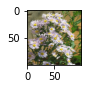

100%|██████████| 1052/1052 [00:01<00:00, 721.69it/s]


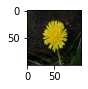

100%|██████████| 784/784 [00:01<00:00, 757.57it/s]


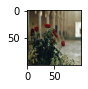

100%|██████████| 733/733 [00:01<00:00, 603.04it/s]


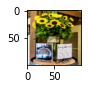

100%|██████████| 984/984 [00:01<00:00, 686.42it/s]


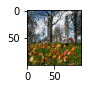

Number of images:  4317


In [6]:
data = prep_data(DATADIR, CATEGORIES, IMG_SIZE)
print('Number of images: ',len(data))

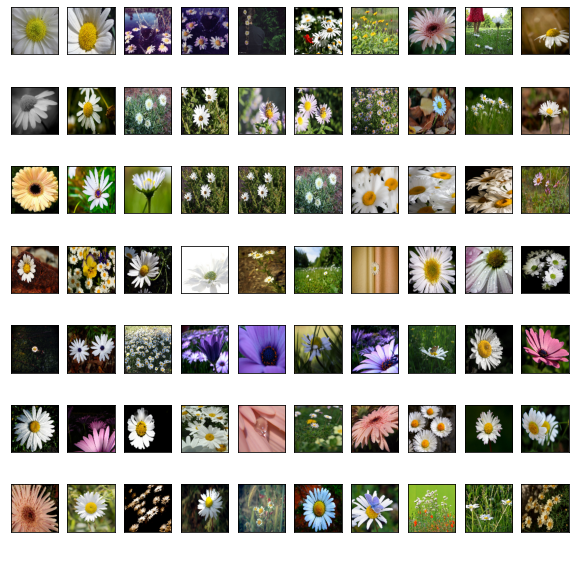

In [7]:
plt.figure(figsize=(10,10))
m = 70
if( len(data) < 70 ):
    m = len(data)
for i in range(m):
    plt.subplot(7,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i][0], cmap='gray')
    plt.xlabel("{}\n({})".format( data[i][1] , data[i][2] ), color='white')    
plt.show()

In [8]:
def save_data(save_name, data):
    pickle_out = open(save_name+"-pickle.pickle","wb")
    print('Arquivo gravado como: '+save_name+"-pickle.pickle")
    pickle.dump(data, pickle_out)
    pickle_out.close()

In [9]:
save_data(local_saida+nome_saida, data)

Arquivo gravado como: ../../../_DATA_/image/pickle/flowers(100x100)-pickle.pickle
